In [11]:
import pandas as pd
from sklearn import datasets
df = datasets.load_digits()

In [12]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
df0 = pd.DataFrame(df.data)

In [14]:
df0["Target"] = df.target

In [15]:
df0

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [21]:
X = df0.drop(["Target"],axis=1)
y = df0.Target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=3)

In [75]:
a.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
a.score(X_test,y_test)

0.9916666666666667

In [82]:
y_pred = a.predict(X_test)

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
b = GridSearchCV(KNeighborsClassifier(),param_grid=dict(n_neighbors=[3,5,10,20,30,50]))

In [92]:
b.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20, 30, 50]})

In [100]:
c = pd.DataFrame(b.cv_results_)

In [101]:
c[["params","mean_test_score"]]

,params,mean_test_score
0,{'n_neighbors': 3},0.984696
1,{'n_neighbors': 5},0.983999
2,{'n_neighbors': 10},0.974257
3,{'n_neighbors': 20},0.962432
4,{'n_neighbors': 30},0.958258
5,{'n_neighbors': 50},0.933195


In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
cm = confusion_matrix(y_test,y_pred)

In [107]:
import seaborn as sb
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

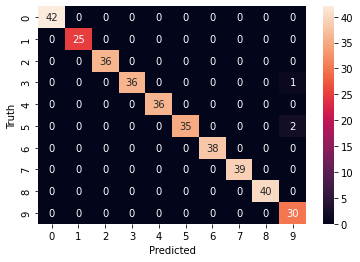

In [108]:
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        36
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      0.95      0.97        37
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        40
           9       0.91      1.00      0.95        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

